<a href="https://colab.research.google.com/github/Raj-kumarpatidar/Resume_dataset/blob/main/DA_long_assignment_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# For CSV files
df = pd.read_csv('/content/UpdatedResumeDataSet.csv')

# # Print every 100th row starting from the first row (index 0)
# for i in range(0, len(df), 100):
#     print(df.iloc[i])


In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Resume').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [33]:
# total size of dataset.
df.size

1924

In [34]:
#Dataset has 962 rows with 2 columns.
df.shape

(962, 2)

In [35]:
#Information about columns of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [36]:
#Check for null values.
df.isnull().sum()

Category    0
Resume      0
dtype: int64

<ipython-input-37-b1adb06ae740>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Category', data= df,palette = 'mako')


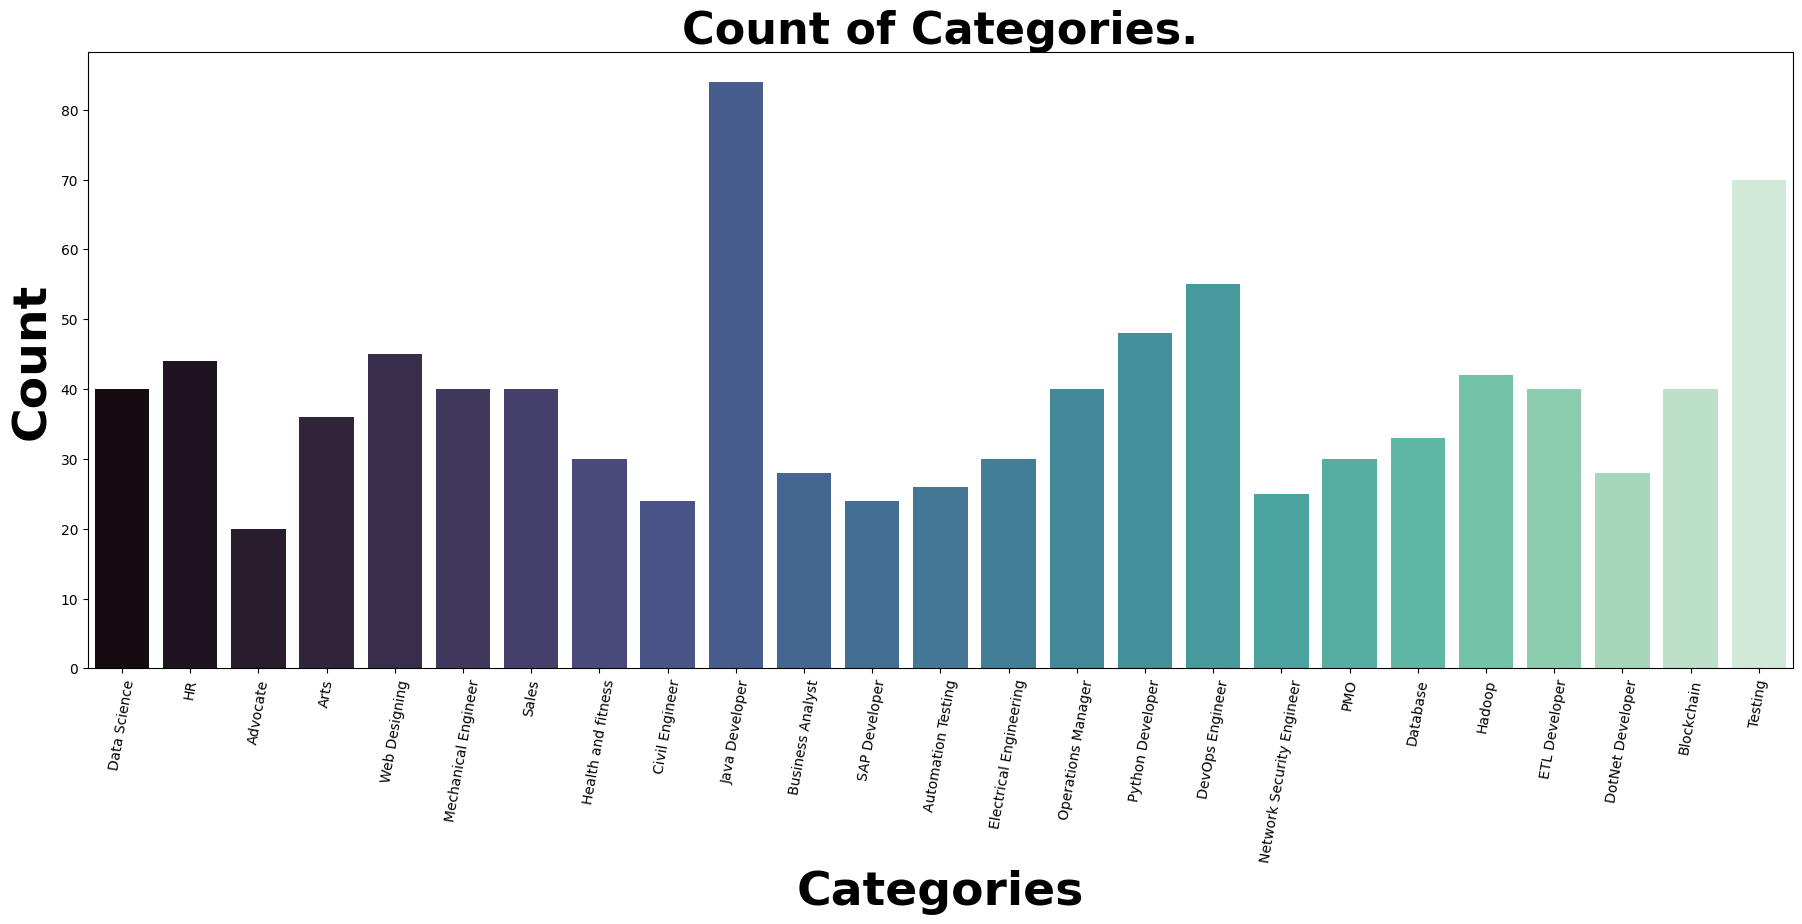

In [37]:
# Create count plot for categoris columns.

plt.figure(figsize=(22,8))
ax = sns.countplot(x = 'Category', data= df,palette = 'mako')
ax.set_title("Count of Categories.",fontweight = 'bold',size=32)
plt.xticks(rotation=80)
ax.set_ylabel('Count',fontweight='bold',size=34)
ax.set_xlabel("Categories",fontweight = 'bold',size=34)
plt.show()

**Most common words**

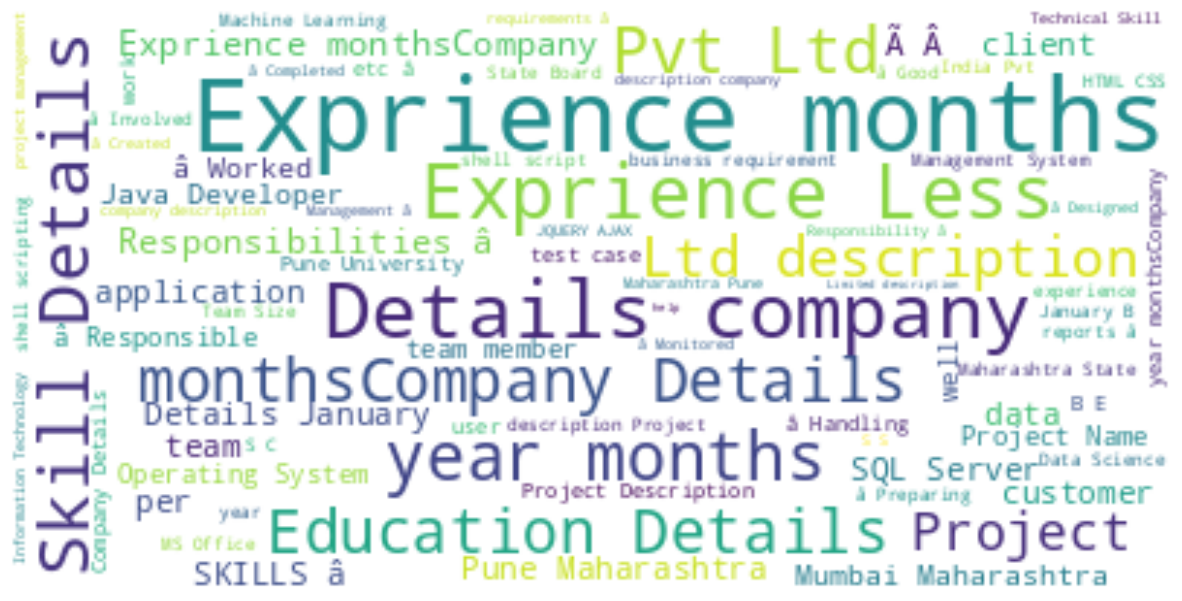

In [38]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
text = " ".join(i for i in df.Resume)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Cleaning the Resume texts**

In [40]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(data)):
  review = re.sub('[^a-zA-Z]', ' ', df['Resume'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
corpus[1]

'educ detail may may b e uit rgpv data scientist data scientist matelab skill detail python exprienc less year month statsmodel exprienc month aw exprienc less year month machin learn exprienc less year month sklearn exprienc less year month scipi exprienc less year month kera exprienc less year monthscompani detail compani matelab descript ml platform busi profession dummi enthusiast koramangala th block achiev task behind sukh sagar bengaluru india develop deploy auto preprocess step machin learn mainli miss valu treatment outlier detect encod scale featur select dimension reduct deploy autom classif regress model linkedin com aditya rathor b b reasearch deploy time seri forecast model arima sarimax holt winter prophet work meta featur extract problem github com rathorolog implement state art research paper outlier detect mix attribut compani matelab descript'

Question 1:-Demonstrate various techniques for feature engineering, such as encoding
categorical variables, handling missing values, creating interaction terms, and
deriving new features from existing ones.


Answer:-1

**Encoding Categorical Variables:**

Since 'category' is a categorical variable, we can use one-hot encoding to convert it into binary features.

One-Hot Encoding: Convert categorical variables into binary vectors where each category is represented by a binary feature.

**Handling Missing Values:**

We'll check for missing values in both 'category' and 'skills' columns and decide on an appropriate strategy for imputation.

Imputation: Replace missing values with a specific statistic (mean, median, mode) or with a value estimated from other observations.

**Creating Interaction Terms:**

We can create interaction terms between 'category' and 'skills' to capture potential relationships between the job category and specific skills.

Multiplication: Create new features by multiplying existing features together.

Addition: Create new features by adding existing features together.

Polynomial Features: Generate interaction terms by raising existing features to different powers.

**Deriving New Features:**

We might extract features from the 'skills' column, such as the number of skills listed, specific keywords or categories of skills, or any other relevant information.

In [42]:
import pandas as pd


# Check if 'category' column exists
if 'Category' in df.columns:
    # Perform one-hot encoding
    one_hot_encoded = pd.get_dummies(df['Category'], prefix='Category')

    # Concatenate the one-hot encoded features with the original dataframe
    df_encoded = pd.concat([df, one_hot_encoded], axis=1)

    # Drop the original categorical variable column
    df_encoded.drop('Category', axis=1, inplace=True)

    print(df_encoded)
else:
    print("Error: 'Category' column not found in the DataFrame.")


                                                Resume  Category_Advocate  \
0    Skills * Programming Languages: Python (pandas...              False   
1    Education Details \r\nMay 2013 to May 2017 B.E...              False   
2    Areas of Interest Deep Learning, Control Syste...              False   
3    Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...              False   
4    Education Details \r\n MCA   YMCAUST,  Faridab...              False   
..                                                 ...                ...   
957  Computer Skills: â¢ Proficient in MS office (...              False   
958  â Willingness to accept the challenges. â ...              False   
959  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...              False   
960  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...              False   
961  Skill Set OS Windows XP/7/8/8.1/10 Database MY...              False   

     Category_Arts  Category_Automation Testing  Category_Blockchain  \
0  

Question 2:- Perform exploratory data analysis, visualizing the distributions of key variables
and identifying outliers. Investigate the relationship between different variables in
a dataset using rank, , correlation matrices and scatter plots.

Answer 2:-
EDA helps to understand the dataset’s characteristics, distributions, and relation-
ships between variables. Techniques used in EDA include:
• Visualizing key variable distributions: Utilizing histograms, density plots, or
box plots to understand the distributions of numerical variables.
• Identifying outliers: Employing techniques like box plots or scatter plots to
identify extreme values that may skew the analysis.
• Investigating variable relationships: Utilizing rank correlation, correlation ma-
trices, and scatter plots to explore the relationships between different variables
in the dataset.


In [45]:
df.shape

(962, 2)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [47]:
df.isna().sum()

Category    0
Resume      0
dtype: int64

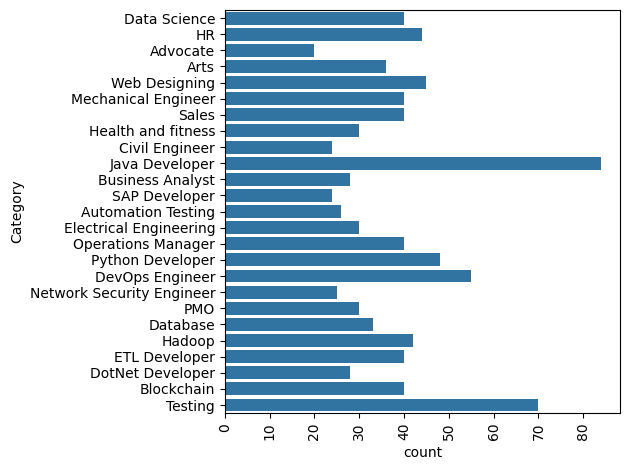

In [44]:
sns.countplot(df.Category)
plt.xticks(rotation=90)
plt.tight_layout();

In [48]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


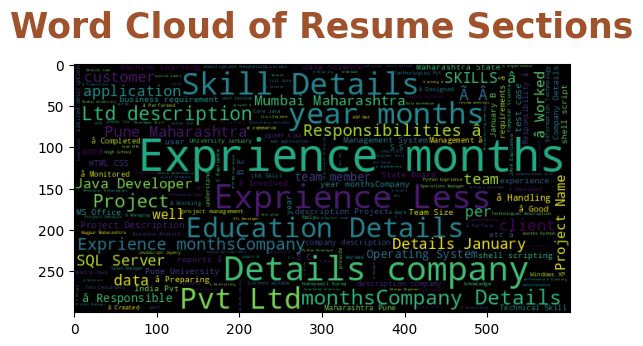

In [49]:
wc = WordCloud(width=600,height=300,random_state=101).generate(' '.join(df.Resume))
plt.title(label='Word Cloud of Resume Sections',pad=20,fontsize=25,fontweight='bold',color='sienna')
plt.imshow(wc);

Question 5:- Compare and contrast different evaluation metrics for classification (e.g.,
accuracy, precision, recall, F1-score) and regression (e.g., mean squared error,
R-squared). Discuss the strengths and limitations of each metric and when to use
them.

Answer 5:-
To effectively compare and contrast different evaluation metrics for classification and regression tasks, let's break down each metric along with its strengths, limitations, and appropriate use cases:

Classification Evaluation Metrics:
Accuracy:

Strengths: Provides a simple measure of overall model performance, easy to interpret.
Limitations: Doesn't consider class imbalances and may not be suitable for datasets with unequal class distributions.
When to Use: Suitable when all classes are equally important and the dataset is balanced.
Precision:

Strengths: Useful when minimizing false positives is crucial, such as in medical diagnosis or spam detection.
Limitations: Doesn't account for false negatives and may not provide a complete picture of model performance.
When to Use: When the cost of false positives is high and false negatives are less critical.
Recall:

Strengths: Valuable when minimizing false negatives is crucial, like in detecting rare diseases or fraud detection.
Limitations: Ignores false positives and may not be suitable in scenarios where false positives are costly.
When to Use: When it's important to capture all positive instances, even if it means accepting some false positives.
F1-Score:

Strengths: Balances precision and recall, providing a single metric that considers both false positives and false negatives.
Limitations: May not be the best choice when one metric is more critical than the other.
When to Use: When there's an imbalance between precision and recall, and you want to consider both types of errors equally.
Regression Evaluation Metrics:
Mean Squared Error (MSE):

Strengths: Measures the average of the squared differences between predicted and actual values.
Limitations: Sensitive to outliers and gives higher weight to larger errors.
When to Use: When you want to assess overall prediction accuracy and outliers aren't a significant concern.
R-squared (Coefficient of Determination):

Strengths: Indicates the proportion of variance in the dependent variable that is predictable from the independent variables.
Limitations: Doesn't penalize for overfitting and may give misleading results with complex models.
When to Use: When you want to understand how well the independent variables explain the variability of the dependent variable.


In [64]:
import re

def cleanResume(resumeText):
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) # remove non-ascii characters
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    resumeText = re.sub(r'[0-9]+', '', resumeText)  #remove numbers
    return resumeText.lower()

In [67]:
df["Cleaned Resume"] = df["Resume"].apply(lambda x: cleanResume(x))

In [68]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk import word_tokenize

len(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [70]:
ds_df = df[df.Category == 'HR']
resumes=""
total_words = []
for resume in ds_df["Cleaned Resume"]:
    resumes += resume
    words = word_tokenize(resume)
    for word in words :
        if word not in set(stopwords.words('english')) and word not in string.punctuation:
            total_words.append(word)

In [71]:
freq_word = nltk.FreqDist(total_words)

In [72]:
from sklearn.model_selection import train_test_split

text = df["Cleaned Resume"].values
labels = df["Category"].values

text_train,text_test,y_train,y_test = train_test_split(text, labels, random_state=0, test_size=0.25, stratify=df.Category)

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    use_idf = True,
    stop_words='english',
    max_features=1000)

In [74]:
X_train = word_vectorizer.fit_transform(text_train)
X_train.shape

(721, 1000)

In [75]:
X_test = word_vectorizer.transform(text_test)

In [76]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(MultinomialNB()).fit(X_train, y_train)
prediction_mnb = clf.predict(X_test)
print('MultinomialNB Classifier accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('MultinomialNB Classifier accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

MultinomialNB Classifier accuracy on training set: 0.99
MultinomialNB Classifier accuracy on test set: 0.97


In [77]:
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_mnb, zero_division=0))

                           precision    recall  f1-score   support

                 Advocate       1.00      0.80      0.89         5
                     Arts       1.00      1.00      1.00         9
       Automation Testing       1.00      0.67      0.80         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00         6
             Data Science       1.00      1.00      1.00        10
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      0.57      0.73         7
            ETL Developer       1.00      1.00      1.00        10
   Electrical Engineering       0.89      1.00      0.94         8
                       HR       1.00      1.00      1.00        11
                   Hadoop       1.00      1.00      1.00     

Question 6:- Use principal component analysis (PCA)/Singular Value Decomposition (SVD) to
reduce the dimensionality of a dataset and visualize the principal components.

Answer 6:-Principal Component Analysis (PCA) and Singular Value Decomposition (SVD) are powerful dimensionality reduction techniques. By transforming the dataset into a lower-dimensional space, they facilitate visualization and identification of key features driving variance in the data. This simplification aids in understanding complex datasets and extracting essential information for analysis and modeling purposes

Question 8:-Develop an interactive dashboard using tools like Tableau, Power BI, or Plotly
Dash, allowing users to explore different aspects of the data.


Answer 8:-An interactive dashboard is a visual interface that allows users to interactively explore and analyze data. Using tools like Tableau, Power BI, or Plotly Dash, users can dynamically navigate through different aspects of the dataset, such as trends in education, work experience, and skills. This means users can filter, drill down, or zoom into specific data points, visualize trends over time or across categories, and gain insights through interactive charts, graphs, and tables. Interactive dashboards enhance data exploration, facilitate better understanding of complex datasets, and support data-driven decision-making by enabling users to tailor their analysis according to their specific needs and interests.

In [50]:
import pandas as pd
import plotly.express as px
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [51]:
df = pd.read_csv('/content/UpdatedResumeDataSet.csv')

df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [52]:
df.shape

(962, 2)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [54]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [55]:
fig = px.histogram(
    df, x="Category", title="Distribution of Jobs Categories"
).update_xaxes(categoryorder="total descending")
fig.show()

Jobs Distribution : - From the above bar chart we can see that there are 25 different categories we have in the data.

The top 3 job categories we have in the data are as follows.

Java developer, Testing, and DevOps Engineer.

In [56]:
series = df['Category'].value_counts()

df_result = pd.DataFrame(series)

df_result = df_result.reset_index()

df_result.columns = ['Category', 'Total']

print(df_result)

                     Category  Total
0              Java Developer     84
1                     Testing     70
2             DevOps Engineer     55
3            Python Developer     48
4               Web Designing     45
5                          HR     44
6                      Hadoop     42
7                  Blockchain     40
8               ETL Developer     40
9          Operations Manager     40
10               Data Science     40
11                      Sales     40
12        Mechanical Engineer     40
13                       Arts     36
14                   Database     33
15     Electrical Engineering     30
16         Health and fitness     30
17                        PMO     30
18           Business Analyst     28
19           DotNet Developer     28
20         Automation Testing     26
21  Network Security Engineer     25
22              SAP Developer     24
23             Civil Engineer     24
24                   Advocate     20


In [57]:
df_result_part = df_result.head(21)
print(df_result_part)

                  Category  Total
0           Java Developer     84
1                  Testing     70
2          DevOps Engineer     55
3         Python Developer     48
4            Web Designing     45
5                       HR     44
6                   Hadoop     42
7               Blockchain     40
8            ETL Developer     40
9       Operations Manager     40
10            Data Science     40
11                   Sales     40
12     Mechanical Engineer     40
13                    Arts     36
14                Database     33
15  Electrical Engineering     30
16      Health and fitness     30
17                     PMO     30
18        Business Analyst     28
19        DotNet Developer     28
20      Automation Testing     26


In [58]:
fig = px.pie(df_result_part,
                 values='Total',
                 names='Category')

fig.show()

From the above pie chart, Instead of the count or frequency, we can also visualize the distribution of job categories in percentage

Question 10:-Investigate how cross-validation enhances confidence in accuracy estimates by
assessing model performance across multiple data splits. Discuss the results
aligning with distribution tests like z-test or t-test to validate the statistical
significance of observed performance differences.


Answer 10:-Cross-validation is a technique used to evaluate the performance of machine learning models by splitting the dataset into multiple subsets. By training the model on different combinations of these subsets and evaluating its performance on the remaining data, cross-validation provides a more reliable estimate of the model's accuracy. Additionally, statistical tests like z-test or t-test can be employed to determine if observed performance differences between models are statistically significant, helping to ensure the robustness and validity of the evaluation results.